# Supermart Grocery Retail Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [6]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
df['Customer Name'].max()

'Yusuf'

In [8]:
len(df[df['Customer Name']=='Yusuf'])

201

In [9]:
df['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [10]:
df['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [11]:
df['Category'].max()

'Snacks'

In [12]:
df['Sub Category'].max()

'Spices'

In [13]:
df['Region'].unique()

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [14]:
df['Region'].max()

'West'

In [15]:
df['Sales'].max()

2500

In [16]:
df['Sales'].min()

500

In [17]:
df['Category'].value_counts()

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

In [18]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

In [19]:
df['Category'].value_counts().plot.pie

<bound method PlotAccessor.pie of <pandas.plotting._core.PlotAccessor object at 0x000001B6D9949850>>

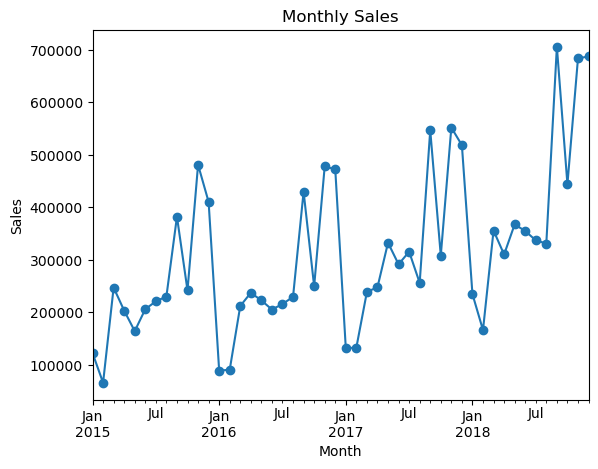

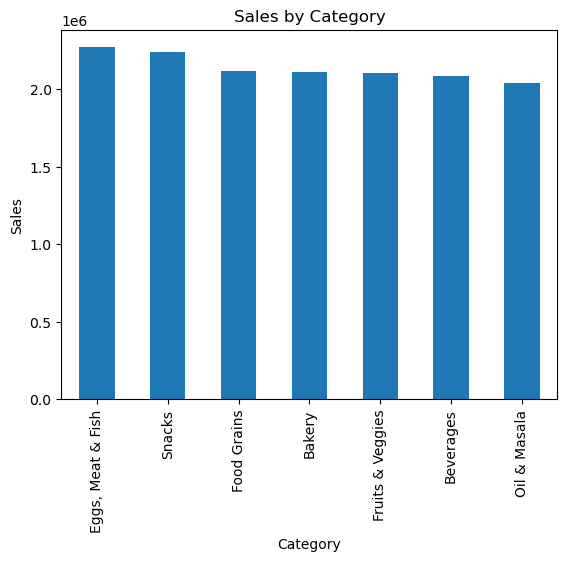

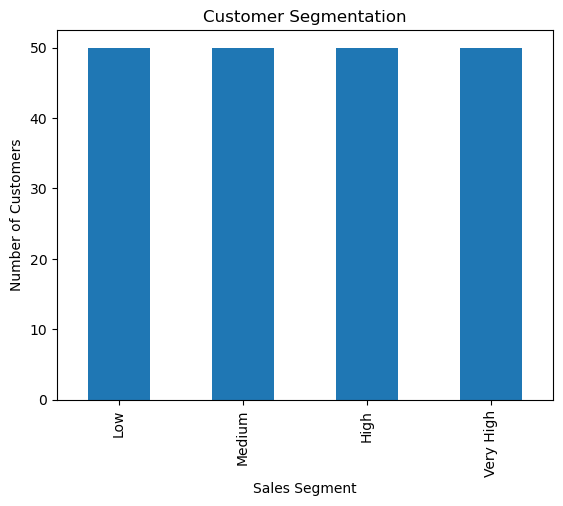

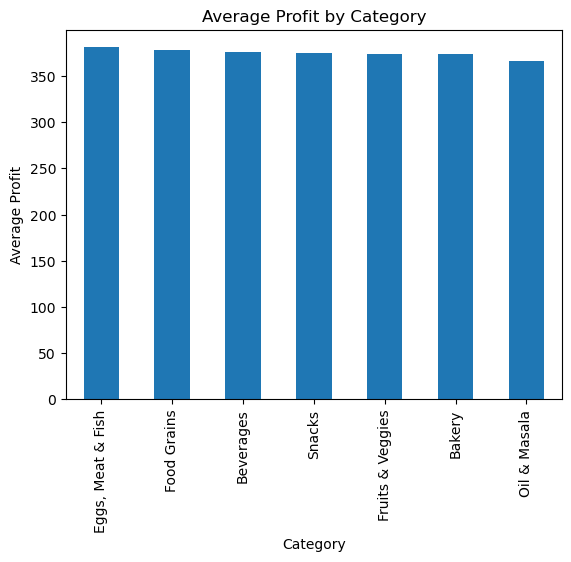

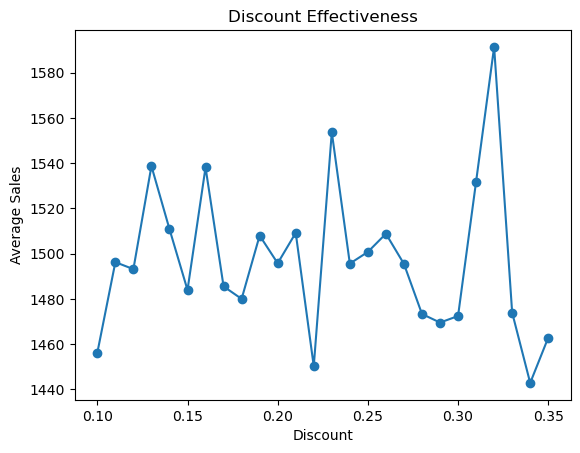

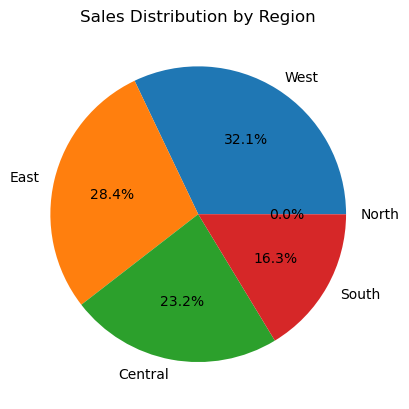

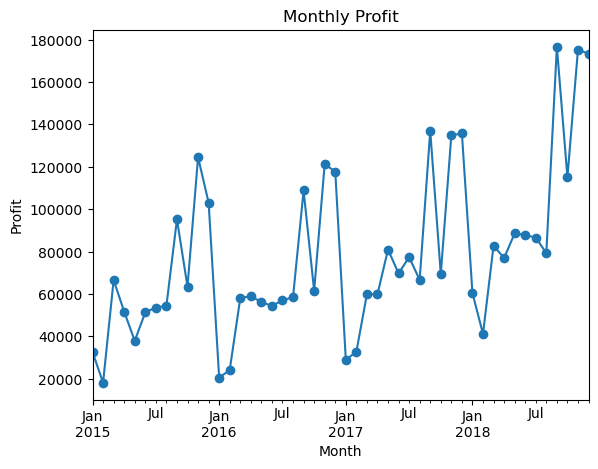

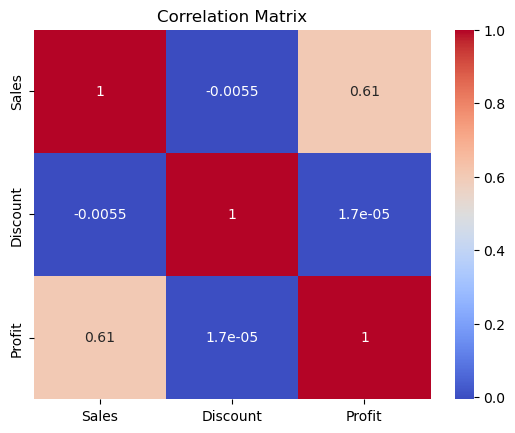

In [20]:
monthly_sales = df.groupby(pd.to_datetime(df['Order Date']).dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


customer_segmentation = pd.qcut(df['Sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Sales Segment'] = customer_segmentation
segmented_customers = df.groupby('Sales Segment')['Customer Name'].nunique()
segmented_customers.plot(kind='bar')
plt.title('Customer Segmentation')
plt.xlabel('Sales Segment')
plt.ylabel('Number of Customers')
plt.show()


profit_by_category = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
profit_by_category.plot(kind='bar')
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.show()


discount_effectiveness = df.groupby('Discount')['Sales'].mean()
discount_effectiveness.plot(kind='line', marker='o')
plt.title('Discount Effectiveness')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.show()


sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_by_region.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


monthly_profit = df.groupby(pd.to_datetime(df['Order Date']).dt.to_period('M'))['Profit'].sum()
monthly_profit.plot(kind='line', marker='o')
plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()


correlation_matrix = df[['Sales', 'Discount', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()